<h1 style="font-size: 40px; color: #2E86C1; text-align: center; font-weight: bold; text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3); margin-top: 20px;">
    🌟 Binary Classification of Insurance Cross Selling 🌟
</h1>

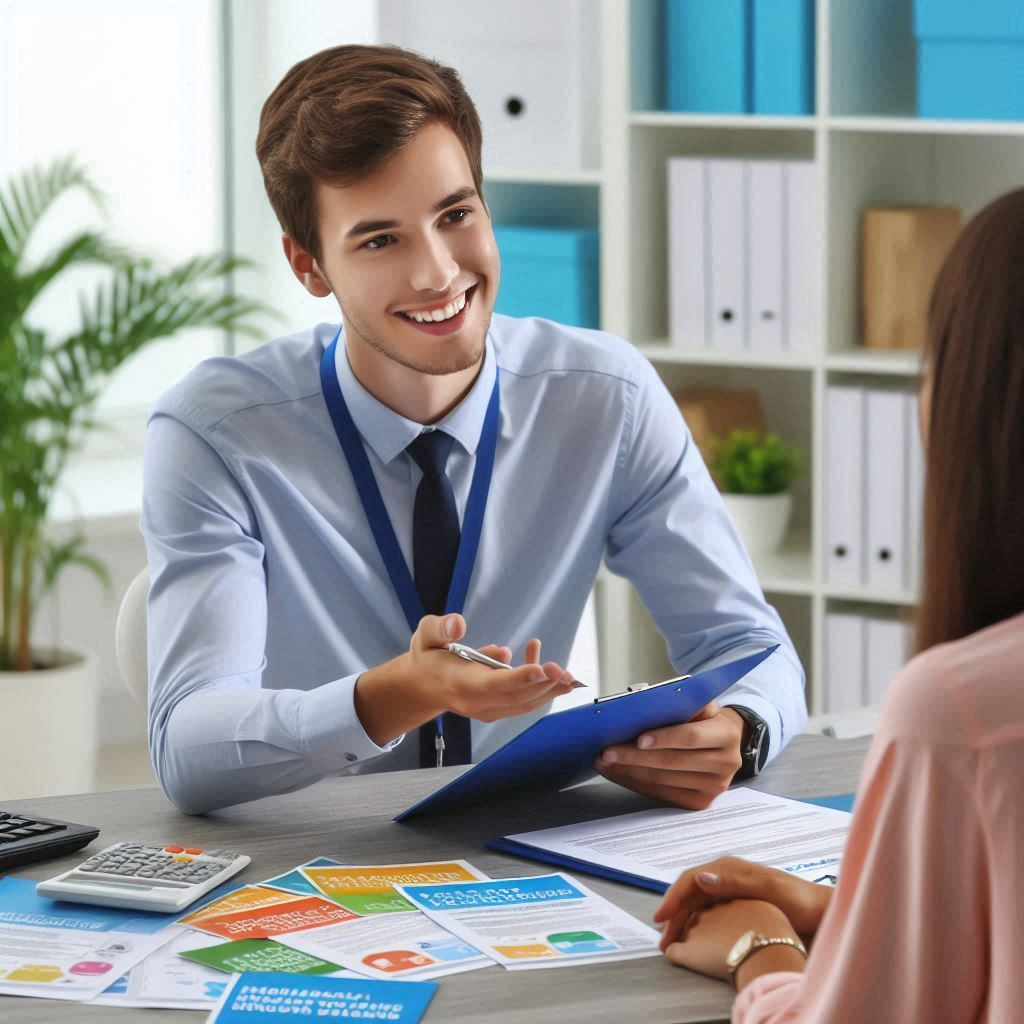

In [1]:
from IPython.display import Image, display

# Path to the uploaded image
image_path = '/kaggle/input/sjxvvxlajlstuwcvllut/_2383e3eb-2824-437a-8c43-d0db4d45467b.jpeg'

# Display the image
display(Image(filename=image_path))

<style>
    @keyframes rainbow {
        0% { background-position: 0% 50%; }
        100% { background-position: 100% 50%; }
    }
</style>

<div style="background-color:black; padding:20px; border-radius:10px; margin-bottom:20px; box-shadow: 0 8px 16px rgba(0, 0, 0, 0.3);">
    <h1 style="text-align:center; font-size:36px; font-weight:bold; background: linear-gradient(to right, red, orange, yellow, green, blue, indigo, violet); -webkit-background-clip: text; color: transparent; background-size: 200% auto; animation: rainbow 5s linear infinite;">
        About Author
    </h1>
    <p style="font-size:16px;"></p>
</div>

<div style="border: 2px solid #14adc6; padding: 10px; max-width: 1000px; margin: 0 auto;">
    <p>
        Hey , What's up Guys 🌟
    </p>
    <p>
        I am <b>Tayyab Hussain</b>, a passionate data scientist dedicated to mastering machine learning techniques and continually expanding my knowledge base. I believe in the mantra of KeepLearning and KeepSupporting, as I am committed to constant growth and uplifting others in the field. 🚀
    </p>
    <p>
        You can find more about me on my <a href="https://www.linkedin.com/in/tayyab-hussain-72b972267?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app" target="_blank">LinkedIn</a>.<br>
        Feel free to connect and reach out for any collaboration or queries! 📊
    </p>
    <p>My skills include:</p>
    <ul style="list-style-type: disc; margin-left: 20px;">
        <li>Data Analysis 📉</li>
        <li>Machine Learning 🤖</li>
        <li>Deep Learning 🧠</li>
        <li>Statistical Modeling 📈</li>
        <li>Data Visualization 📊</li>
    </ul>
    <p>If you find any content helpful, consider giving it an upvote. Your support means a lot! 👍</p>

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#903191; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">Import Libraries </h1>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from IPython.display import display, HTML
import warnings
from colorama import Fore, Style

from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, OneHotEncoder

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')


<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#903191; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">Load the Data </h1>

In [3]:
# load the train , test  and submission dataset

tr_d = pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv') # train dataset
ts_d = pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv') # test dataset
sb_d = pd.read_csv('/kaggle/input/playground-series-s4e7/sample_submission.csv') # submission dataset

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#903191; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">Let's look data </h1>

In [4]:
def styled_heading(text):
     return f"""
    <div style=" padding:20px; border-radius:10px; margin-bottom:20px;">
        <h1 style="color:#2E86C1; text-align:center; font-size:36px; font-weight:bold;">{text}</h1>
        <p style="font-size:16px;"></p>
    </div>
    """

def print_error(message):
    display(HTML(styled_heading("Error")))
    print(f"An error occurred: {message}")

# Helper function to generate colored horizontal line
def colored_line(color='#323c6a'):
    return ""

def print_dataset_analysis(train_dataset, test_dataset, n_top=5, heading_color='#323c6a', line_color='#323c6a'):
    try:
        # Printing top values
        train_heading = styled_heading(f"Top {n_top} rows of Training Dataset")
        test_heading = styled_heading(f"Top {n_top} rows of Test Dataset")

        display(HTML(colored_line(line_color)))
        display(HTML(train_heading))
        display(HTML(colored_line(line_color)))
        display(HTML(train_dataset.head(n_top).to_html()))

        display(HTML(colored_line(line_color)))
        display(HTML(test_heading))
        display(HTML(colored_line(line_color)))
        display(HTML(test_dataset.head(n_top).to_html()))
        
        # Printing dataset summary
        summary_heading = styled_heading("Summary of Dataset")
        display(HTML(colored_line(line_color)))
        display(HTML(summary_heading))
        display(HTML(colored_line(line_color)))
        display(HTML(train_dataset.describe().to_html()))

        # Printing null values
        null_heading = styled_heading("Null Values in Datasets")
        
        train_null_count = train_dataset.isnull().sum()
        test_null_count = test_dataset.isnull().sum()

        display(HTML(colored_line(line_color)))
        display(HTML(null_heading))
        display(HTML(colored_line(line_color)))
        display(HTML("<h3>Training Dataset:</h3>"))
        if train_null_count.sum() == 0:
            display(HTML("<p>No null values in the training dataset.</p>"))
        else:
            display(HTML(train_null_count[train_null_count > 0].to_frame().to_html()))
            display(HTML("<p>These are the null values.</p>"))

        display(HTML("<h3>Test Dataset:</h3>"))
        if test_null_count.sum() == 0:
            display(HTML("<p>No null values in the test dataset.</p>"))
        else:
            display(HTML(test_null_count[test_null_count > 0].to_frame().to_html()))
            display(HTML("<p>These are the null values.</p>"))

        # Printing duplicate values
        duplicate_heading = styled_heading("Duplicate Values in Datasets")
        
        train_duplicates = train_dataset.duplicated().sum()
        test_duplicates = test_dataset.duplicated().sum()

        display(HTML(colored_line(line_color)))
        display(HTML(duplicate_heading))
        display(HTML(colored_line(line_color)))
        display(HTML("<h3>Training Dataset:</h3>"))
        display(HTML(f"<p>{train_duplicates} duplicate rows</p>"))

        display(HTML("<h3>Test Dataset:</h3>"))
        display(HTML(f"<p>{test_duplicates} duplicate rows</p>"))
        
        # Printing number of rows and columns
        shape_heading = styled_heading("Number of Rows and Columns")
        display(HTML(colored_line(line_color)))
        display(HTML(shape_heading))
        display(HTML(colored_line(line_color)))
        display(HTML("<h3>Training Dataset:</h3>"))
        display(HTML(f"<p>Rows: {train_dataset.shape[0]}, Columns: {train_dataset.shape[1]}</p>"))
        display(HTML("<h3>Test Dataset:</h3>"))
        display(HTML(f"<p>Rows: {test_dataset.shape[0]}, Columns: {test_dataset.shape[1]}</p>"))

    except Exception as e:
        print_error(str(e))

def print_unique_values(test_dataset, heading_color='#323c6a', line_color='#323c6a'):
    try:
        unique_values_heading = styled_heading("Unique Values in Training Dataset")
        
        display(HTML(colored_line(line_color)))
        display(HTML(unique_values_heading))
        display(HTML(colored_line(line_color)))
        
        unique_values_table = "<table border='1'><tr><th>Column Name</th><th>Data Type</th><th>Unique Values</th></tr>"
        
        for column in test_dataset.columns:
            unique_values = test_dataset[column].unique()[:7]  # Taking at least 7 unique values
            unique_values_str = ', '.join(map(str, unique_values))
            data_type = test_dataset[column].dtype
            unique_values_table += f"<tr><td>{column}</td><td>{data_type}</td><td>{unique_values_str}</td></tr>"
        
        unique_values_table += "</table>"
        display(HTML(unique_values_table))
    
    except Exception as e:
        print_error(str(e))

In [5]:
print_dataset_analysis(tr_d, ts_d)
print_unique_values(tr_d)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


Column Name,Data Type,Unique Values
id,int64,"0, 1, 2, 3, 4, 5, 6"
Gender,object,"Male, Female"
Age,int64,"21, 43, 25, 35, 36, 31, 23"
Driving_License,int64,"1, 0"
Region_Code,float64,"35.0, 28.0, 14.0, 1.0, 15.0, 47.0, 45.0"
Previously_Insured,int64,"0, 1"
Vehicle_Age,object,"1-2 Year, > 2 Years, < 1 Year"
Vehicle_Damage,object,"Yes, No"
Annual_Premium,float64,"65101.0, 58911.0, 38043.0, 2630.0, 31951.0, 28150.0, 27128.0"
Policy_Sales_Channel,float64,"124.0, 26.0, 152.0, 156.0, 160.0, 8.0, 31.0"


<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#903191; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">Distribution of Numeric cols</h1>

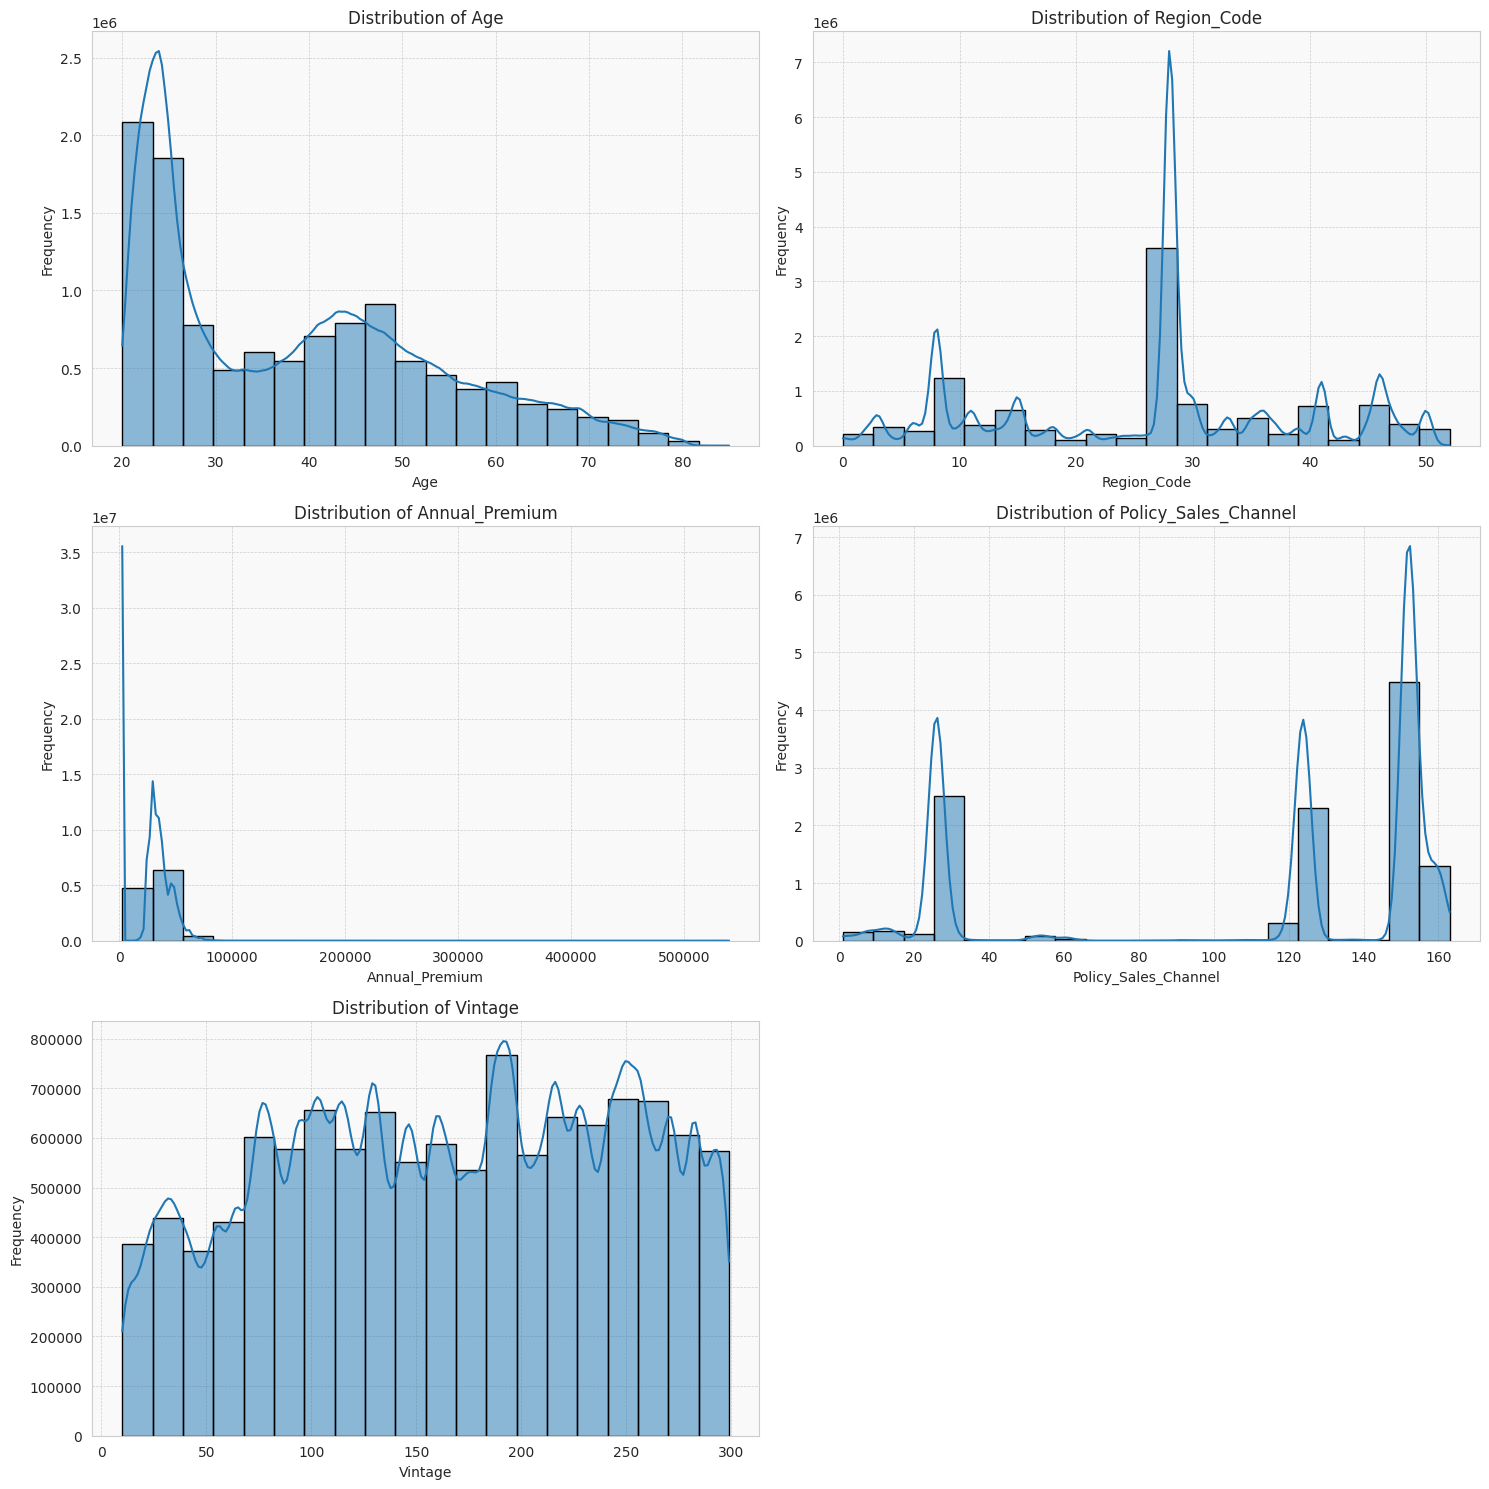

In [6]:
def plot_numeric_distribution(df_train):
    # Define all numeric columns to plot
    numeric_columns = [
        'Age',  'Region_Code',
         'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'
    ]
    
    # Adjust layout parameters
    background_color = '#f9f9f9'
    sns.set_style("whitegrid", {"axes.facecolor": background_color})
    
    num_plots = len(numeric_columns)
    num_rows = (num_plots + 1) // 2  # Adjust number of rows for subplot layout
    num_cols = 2  # Set number of columns for subplot layout
    
    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axs = axs.flatten()
    
    # Plot each numeric column
    for i, col in enumerate(numeric_columns):
        # Histogram with KDE plot
        p = sns.histplot(df_train[col], bins=20, kde=True, ax=axs[i], palette='magma', edgecolor='black', linewidth=1)
        p.set_title(f"Distribution of {col}")
        p.set_xlabel(col)
        p.set_ylabel("Frequency")
        p.grid(True, linestyle='--', linewidth=0.5)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

# Usage example:
plot_numeric_distribution(tr_d)

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#903191; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">Preprocess the data</h1>

In [7]:
le = LabelEncoder()
tr_d['Gender'] = le.fit_transform(tr_d['Gender'])
tr_d['Vehicle_Damage'] = le.fit_transform(tr_d['Vehicle_Damage'])
tr_d['Vehicle_Age'] = le.fit_transform(tr_d['Vehicle_Age'])

In [8]:
from sklearn.preprocessing import StandardScaler ,MinMaxScaler


col_to_stn = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

# Initialize StandardScaler
scaler = MinMaxScaler()

# Fit and transform only the selected col
tr_d[col_to_stn] = scaler.fit_transform(tr_d[col_to_stn])

In [9]:
tr_d.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,0.015385,1,0.673077,0,0,1,0.116218,0.759259,0.612457,0
1,1,1,0.353846,1,0.538462,0,2,1,0.104702,0.154321,0.961938,1
2,2,0,0.076923,1,0.269231,1,1,0,0.065880,0.932099,0.844291,0
3,3,0,0.230769,1,0.019231,0,0,1,0.000000,0.956790,0.228374,0
4,4,0,0.246154,1,0.288462,1,0,0,0.054547,0.932099,0.982699,0


In [10]:
ts_d['Gender'] = le.fit_transform(ts_d['Gender'])
ts_d['Vehicle_Damage'] = le.fit_transform(ts_d['Vehicle_Damage'])
ts_d['Vehicle_Age'] = le.fit_transform(ts_d['Vehicle_Age'])

In [11]:
ts_d[col_to_stn] = scaler.fit_transform(ts_d[col_to_stn])

In [12]:
ts_d.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,0,0.000000,1,0.903846,0,1,0,0.000000,0.981481,0.754325
1,11504799,1,0.415385,1,0.538462,0,0,1,0.064839,0.759259,0.391003
2,11504800,1,0.415385,1,0.826923,0,0,1,0.000000,0.154321,0.903114
3,11504801,0,0.030769,1,0.903846,1,1,0,0.040689,0.932099,0.363322
4,11504802,1,0.476923,1,0.365385,0,0,0,0.058573,0.759259,0.477509


In [13]:
# for later use 
id_s= ts_d['id'].copy()

In [14]:
id_s.head()

0    11504798
1    11504799
2    11504800
3    11504801
4    11504802
Name: id, dtype: int64

In [15]:
ts_d = ts_d.drop('id' , axis =1)
ts_d.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,0.000000,1,0.903846,0,1,0,0.000000,0.981481,0.754325
1,1,0.415385,1,0.538462,0,0,1,0.064839,0.759259,0.391003
2,1,0.415385,1,0.826923,0,0,1,0.000000,0.154321,0.903114
3,0,0.030769,1,0.903846,1,1,0,0.040689,0.932099,0.363322
4,1,0.476923,1,0.365385,0,0,0,0.058573,0.759259,0.477509


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = tr_d.drop(['id' ,'Response'], axis=1)
y= tr_d['Response']

X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size=0.2,random_state=5 )

In [18]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.2973762	total: 1.41s	remaining: 23m 25s
1:	learn: 0.2730583	total: 2.48s	remaining: 20m 36s
2:	learn: 0.2679775	total: 3.54s	remaining: 19m 37s
3:	learn: 0.2662092	total: 4.57s	remaining: 18m 57s
4:	learn: 0.2651322	total: 5.61s	remaining: 18m 36s
5:	learn: 0.2642851	total: 6.66s	remaining: 18m 23s
6:	learn: 0.2637535	total: 7.7s	remaining: 18m 11s
7:	learn: 0.2632174	total: 8.63s	remaining: 17m 49s
8:	learn: 0.2627178	total: 9.63s	remaining: 17m 40s
9:	learn: 0.2622064	total: 10.7s	remaining: 17m 36s
10:	learn: 0.2619493	total: 11.7s	remaining: 17m 31s
11:	learn: 0.2616579	total: 12.8s	remaining: 17m 33s
12:	learn: 0.2614350	total: 13.8s	remaining: 17m 25s
13:	learn: 0.2613126	total: 14.8s	remaining: 17m 19s
14:	learn: 0.2611073	total: 15.7s	remaining: 17m 10s
15:	learn: 0.2608819	total: 16.6s	remaining: 17m 2s
16:	learn: 0.2606400	total: 17.6s	remaining: 16m 57s
17:	learn: 0.2604528	total: 18.5s	remaining: 16m 50s
18:	learn: 0.2600982	total: 19.6s

In [19]:
y_pred = model.predict(X_test)

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94   2018336
           1       0.57      0.13      0.22    282624

    accuracy                           0.88   2300960
   macro avg       0.73      0.56      0.58   2300960
weighted avg       0.85      0.88      0.85   2300960



In [21]:
# Get predicted probabilities
y_pred_sub_proba = model.predict_proba(ts_d)

In [22]:
# Extract probabilities for the positive class (class 1)
y_pred_sub_proba_pos = y_pred_sub_proba[:, 1]

In [23]:
y_pred_sub_proba_pos[:5]

array([6.73971633e-03, 4.68199302e-01, 2.29835223e-01, 3.78261334e-05,
       7.15367472e-02])

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#903191; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">Submission </h1>

In [24]:
import pandas as pd

# Assuming ts_d has an 'id' column
submission = pd.DataFrame({
    'id': id_s ,
    'Response': y_pred_sub_proba_pos
})

# Save the submission data frame to a CSV file
submission.to_csv('best_submission_2.csv', index=False)

print("Submission file created successfully.")

Submission file created successfully.


In [25]:
submission_file = pd.read_csv('/kaggle/working/best_submission_2.csv')
submission_file.head()

,id,Response
0,11504798,0.006740
1,11504799,0.468199
2,11504800,0.229835
3,11504801,0.000038
4,11504802,0.071537


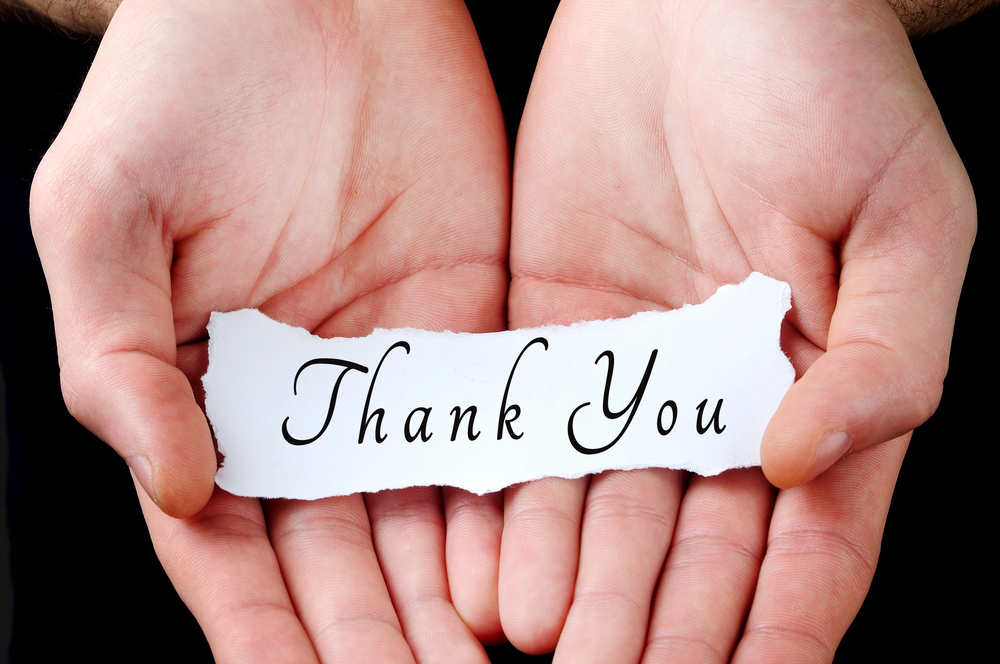

In [26]:
from IPython.display import Image, display

# Path to the uploaded image
image_path = '/kaggle/input/sjxvvxlajlstuwcvllut/thank-you.jpg'

# Display the image
display(Image(filename=image_path))